In [11]:
from skimage import data, exposure, filters, io, segmentation, external
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [12]:
def dendritic_polarplot(sine, cos, nbins, norm_ori_vec, DGI, Name):
    
    ## Convert vector coordinates into degree
    angles = np.arctan2(cos, sine)
    vec_angles = np.degrees(angles)

    
    ## Separate the vectors into different bins according to directions
    
    histo = np.histogram(vec_angles, bins = nbins)
    histo = np.array(histo)
    
    ## Colour the bars differently
    
    cmap_hist = sns.husl_palette(nbins)
    
    ## Normalize the bar length
    
    bar_length = []
    for elem in histo[0]:
        bar_length.append(elem/np.sum(histo[0]))
    bar_length.append(0)
    bar_length = np.array(bar_length)
    
    
    ## Add the normalized orientation vector of the dendrite
    
    ori_angle = np.degrees(np.arctan2(-norm_ori_vec[1], -norm_ori_vec[0]))
    
    ## Round DGI to 3 decimals
    
    DGI = round(DGI, 4)
    
    ## Make polar plot and add vector
    sns.set()
    ax = plt.subplot(111, polar=True)
    
    bins = np.arange(0.0, 2*np.pi, 2*np.pi/nbins)
 #  arrow = ax.arrow((-ori_angle/180*np.pi)-np.pi/2, 0, 0, DGI, length_includes_head = True, head_width = 0.08, head_length = 0.05,label = DGI)
    bars = ax.bar(-bins-(np.pi/2), bar_length[:-1], width = np.repeat(2*np.pi/nbins, nbins), bottom=0.0, alpha = 0.4)
    
    ax.set_rticks([0.1, 0.2, 0.3, 0.4])
    ax.set_yticklabels(['', '', '', ''])
#     ax.set_rlabel_position(-ori_angle+90)
#     legend = ax.legend(loc = 'upper right', bbox_to_anchor=(1.05,1.05), handles = [arrow])
    ax.set_xticklabels([])
    ax.set_label([None])
# ax.set_xticklabels(['      Posterior', '', 'Dorsal', '', 'Anterior      ', '', 'Ventral', ''])
    for i in range(len(bars)):
        bars[i].set_facecolor(cmap_hist[i])
        bars[i].set_alpha(0.4)
        bars[i].set_edgecolor('k')
    plt.savefig('%s.png' % Name, dpi = 1000)
    plt.show()
    
    print(bar_length)
    
    return True

In [16]:
all_norm_vectors = np.vstack((np.array(pd.read_csv('Output/T4-7_x165y148_Layer3(J).csv')),
                              np.array(pd.read_csv('Output/T4-5_x179y170_Layer3(C).csv')),
                              np.array(pd.read_csv('Output/T4-4_x145y128_Layer3(C).csv')),
                              np.array(pd.read_csv('Output/T4-3_x147y140_Layer3(J).csv')),
                              np.array(pd.read_csv('Output/T4-3_x135y121_Layer3(C).csv')),
                               np.array(pd.read_csv('Output/T4-1_x178y157_Layer3(J).csv')),
                              np.array(pd.read_csv('Output/T4-1_x133y157_Layer3(C).csv'))))

image = ('Control Layer3 n7')
np.savetxt("%s.csv" % image, all_norm_vectors, fmt="%.10f", delimiter=',')

In [17]:
mean_vector = np.sum(all_norm_vectors, axis=0) 
mean_vector_length = np.linalg.norm(mean_vector)
mean_norm_vector = mean_vector/ mean_vector_length
num_vectors = all_norm_vectors.shape[0]
DGI = mean_vector_length/ num_vectors




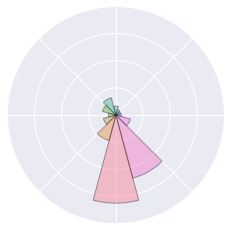

[0.32409078 0.09720195 0.0478713  0.02739443 0.05092789 0.06573973
 0.03285263 0.02085608 0.01778799 0.02013215 0.05519104 0.23995404
 0.        ]


In [18]:
a = dendritic_polarplot(all_norm_vectors[:, 0], all_norm_vectors[:, 1], 12, mean_norm_vector, DGI, 'Control Layer3 n7')